# Ukázka zpracování statistických dat

Vstupní data:

* [Cizinci podle státního občanství, věku a pohlaví](https://data.gov.cz/datov%C3%A9-sady?kl%C3%AD%C4%8Dov%C3%A1-slova=cizinec)

Nejprve stáhneme vybraná data manuálně: https://www.czso.cz/documents/62353418/93789313/290038-18data2004.zip

Stažený soubor rozbalíme. Vznikne tak nový soubor `CIZ01_2004.csv`.

## Načtení vstupních dat

Zopakujeme si, jak otevřít soubor a načíst část jeho obsahu.

In [1]:
soubor = "CIZ01_2004.csv"
fd = open(soubor) # pri chybe zkuste encoding="utf-8-sig"
radky = fd.read().splitlines()
print(radky[0].split(","))
print(radky[1].split(","))
fd.close()

['\ufeff"idhod"', '"hodnota"', '"stapro_kod"', '"pohlavi_cis"', '"pohlavi_kod"', '"stobcan_cis"', '"stobcan_kod"', '"vek_cis"', '"vek_kod"', '"rok"', '"vuzemi_cis"', '"vuzemi_kod"', '"kraj_cis"', '"kraj_kod"', '"vuzemi_txt"', '"kraj_txt"', '"pohlavi_txt"', '"stobcan_txt"', '"vek_txt"']
['"783267904"', '"78263"', '"6121"', '""', '""', '"3228"', '"804"', '""', '""', '"2004"', '"97"', '"19"', '""', '""', '"Česká republika"', '""', '""', '"Ukrajina"', '""']


Tip: Uzavření souboru lze provést automaticky pomocí klauzule `with`.

In [4]:
soubor = "CIZ01_2004.csv"
with open(soubor) as fd:
    radky = fd.read().splitlines()

print(radky[0].split(","))
print(radky[1].split(","))

['\ufeff"idhod"', '"hodnota"', '"stapro_kod"', '"pohlavi_cis"', '"pohlavi_kod"', '"stobcan_cis"', '"stobcan_kod"', '"vek_cis"', '"vek_kod"', '"rok"', '"vuzemi_cis"', '"vuzemi_kod"', '"kraj_cis"', '"kraj_kod"', '"vuzemi_txt"', '"kraj_txt"', '"pohlavi_txt"', '"stobcan_txt"', '"vek_txt"']
['"783267904"', '"78263"', '"6121"', '""', '""', '"3228"', '"804"', '""', '""', '"2004"', '"97"', '"19"', '""', '""', '"Česká republika"', '""', '""', '"Ukrajina"', '""']


Python nabízí specializovaný balíček `csv` pro práci s formátem CSV. Z tohoto balíčku použijeme `DictReader`, který načte obsah souboru CSV do formy slovníku.

In [5]:
from csv import DictReader

fd = open(soubor)
data = DictReader(fd)

for radek in data:
    print(radek)
    break

{'\ufeff"idhod"': '783267904', 'hodnota': '78263', 'stapro_kod': '6121', 'pohlavi_cis': '', 'pohlavi_kod': '', 'stobcan_cis': '3228', 'stobcan_kod': '804', 'vek_cis': '', 'vek_kod': '', 'rok': '2004', 'vuzemi_cis': '97', 'vuzemi_kod': '19', 'kraj_cis': '', 'kraj_kod': '', 'vuzemi_txt': 'Česká republika', 'kraj_txt': '', 'pohlavi_txt': '', 'stobcan_txt': 'Ukrajina', 'vek_txt': ''}


Zkusme vypsat seznam státu, ze kterých cizinci pocházejí.

In [6]:
# tip: set
stobcan_txt = []
for radek in data:
    if radek["stobcan_txt"] not in stobcan_txt:
        stobcan_txt.append(radek["stobcan_txt"])
        
print(stobcan_txt)

['Ukrajina', '', 'Polsko', 'Vietnam', 'Rusko', 'Slovensko', 'Finsko', 'Kypr', 'Řecko', 'Mongolsko', 'Belgie', 'Irsko', 'Portugalsko', 'Španělsko', 'Japonsko', 'Makedonie,býv.jugosl.r.', 'Bulharsko', 'Francie', 'Spojené státy', 'Malta', 'Rumunsko', 'Bosna a Hercegovina', 'Indie', 'Kanada', 'Uzbekistán', 'Dánsko', 'Spojené království', 'Čína', 'Korejská republika', 'Moldavská republika', 'Lucembursko', 'Maďarsko', 'Švédsko', 'Arménie', 'Chorvatsko', 'Kazachstán', 'Litva', 'Lotyšsko', 'Nizozemsko', 'Turecko', 'Estonsko', 'Itálie', 'Německo', 'Rakousko', 'Slovinsko', 'Bělorusko', 'Thajsko', 'Filipíny', 'Syrská arabská repub.', 'Egypt', 'Tunisko', 'Alžírsko', 'Afghánistán', 'Ázerbájdžán', 'Brazílie', 'Chile', 'Tchaj-wan', 'Ghana', 'Írán', 'Irák', 'Jordánsko', 'Mexiko', 'Nepál', 'Nový Zéland', 'Norsko', 'Pákistán', 'Venezuela', 'Albánie', 'Srí Lanka', 'Kolumbie', 'Kuba', 'Indonésie', 'Izrael', 'Kyrgyzstán', 'Jižní Afrika', 'Súdán', 'bez státního občanství', 'Nezjištěno', 'Angola', 'Austrálie

Soubor na závěr uzavřeme.

In [ ]:
fd.close()

## Ukázka knihovny Pandas

Zpracování dat si můžeme výrazně ulehčit pomocí knihovny Pandas. Tato knihovna má vlastní funkci pro načtení CSV souboru.

In [7]:
import pandas as pd

data = pd.read_csv(soubor)
data

idhod  hodnota  stapro_kod  pohlavi_cis  pohlavi_kod  stobcan_cis  \
0      783267904    78263        6121          NaN          NaN       3228.0   
1      783257796      159        6121          NaN          NaN       3228.0   
2      783205432      260        6121          NaN          NaN       3228.0   
3      783234179      377        6121          NaN          NaN       3228.0   
4      783203437      338        6121          NaN          NaN       3228.0   
...          ...      ...         ...          ...          ...          ...   
70910  783267869        2        6121          NaN          NaN       3228.0   
70911  783185447        1        6121          NaN          NaN       3228.0   
70912  783201046        1        6121          NaN          NaN       3228.0   
70913  783266792        1        6121          NaN          NaN       3228.0   
70914  783207911        1        6121          NaN          NaN       3228.0   

       stobcan_kod  vek_cis       vek_kod   rok  vuzemi_cis  vuzemi_kod  \
0            804.0      NaN           NaN  2004          97          19   
1            804.0      NaN           NaN  2004         101       40886   
2            804.0      NaN           NaN  2004         101       40347   
3            804.0      NaN           NaN  2004         101       40631   
4            804.0      NaN           NaN  2004         101       40312   
...            ...      ...           ...   ...         ...         ...   
70910        795.0   7700.0  4.100106e+14  2004          97          19   
70911        795.0   7700.0  4.100106e+14  2004         101       40924   
70912        795.0   7700.0  4.100106e+14  2004         101       40282   
70913        478.0   7700.0  4.100406e+14  2004          97          19   
70914        478.0   7700.0  4.100406e+14  2004         101       40371   

       kraj_cis  kraj_kod        vuzemi_txt              kraj_txt pohlavi_txt  \
0           NaN       NaN   Česká republika                   NaN         NaN   
1         100.0    3140.0           Karviná  Moravskoslezský kraj         NaN   
2         100.0    3034.0             Tábor        Jihočeský kraj         NaN   
3         100.0    3093.0           Svitavy       Pardubický kraj         NaN   
4         100.0    3034.0             Písek        Jihočeský kraj         NaN   
...         ...       ...               ...                   ...         ...   
70910       NaN       NaN   Česká republika                   NaN         NaN   
70911     100.0    3018.0             Praha    Hlavní město Praha         NaN   
70912     100.0    3034.0  České Budějovice        Jihočeský kraj         NaN   
70913       NaN       NaN   Česká republika                   NaN         NaN   
70914     100.0    3042.0       Plzeň-město         Plzeňský kraj         NaN   

        stobcan_txt   vek_txt  
0          Ukrajina       NaN  
1          Ukrajina       NaN  
2          Ukrajina       NaN  
3          Ukrajina       NaN  
4          Ukrajina       NaN  
...             ...       ...  
70910  Turkmenistán  <10, 15)  
70911  Turkmenistán  <10, 15)  
70912  Turkmenistán  <10, 15)  
70913    Mauritánie  <40, 45)  
70914    Mauritánie  <40, 45)  

[70915 rows x 19 columns]

Seznam státu, ze kterých pocházejí cizinci, získáme pomocí funkce `unique()`.

In [8]:
data["stobcan_txt"].unique()

array(['Ukrajina', nan, 'Polsko', 'Vietnam', 'Rusko', 'Slovensko',
       'Finsko', 'Kypr', 'Řecko', 'Mongolsko', 'Belgie', 'Irsko',
       'Portugalsko', 'Španělsko', 'Japonsko', 'Makedonie,býv.jugosl.r.',
       'Bulharsko', 'Francie', 'Spojené státy', 'Malta', 'Rumunsko',
       'Bosna a Hercegovina', 'Indie', 'Kanada', 'Uzbekistán', 'Dánsko',
       'Spojené království', 'Čína', 'Korejská republika',
       'Moldavská republika', 'Lucembursko', 'Maďarsko', 'Švédsko',
       'Arménie', 'Chorvatsko', 'Kazachstán', 'Litva', 'Lotyšsko',
       'Nizozemsko', 'Turecko', 'Estonsko', 'Itálie', 'Německo',
       'Rakousko', 'Slovinsko', 'Bělorusko', 'Thajsko', 'Filipíny',
       'Syrská arabská repub.', 'Egypt', 'Tunisko', 'Alžírsko',
       'Afghánistán', 'Ázerbájdžán', 'Brazílie', 'Chile', 'Tchaj-wan',
       'Ghana', 'Írán', 'Irák', 'Jordánsko', 'Mexiko', 'Nepál',
       'Nový Zéland', 'Norsko', 'Pákistán', 'Venezuela', 'Albánie',
       'Srí Lanka', 'Kolumbie', 'Kuba', 'Indonésie', 'Izr

Nyní pro každý stát vypíšeme počet cizinců. Tento udáj získáme agregací údajů, které mají ve sloupci `vuzemi_txt` hodnotu `"Česká republika"`.

In [20]:
data_vyber = data[data["vuzemi_txt"] == "Česká republika"]
statistika = data_vyber.groupby("stobcan_txt")[["hodnota"]].sum().sort_values("hodnota", ascending=False)
statistika

hodnota
stobcan_txt             
Ukrajina          313052
Slovensko         189416
Vietnam           136716
Polsko             65060
Rusko              58988
...                  ...
Lichtenštejnsko        4
Somálsko               4
Surinam                4
Fidži                  4
Nauru                  4

[166 rows x 1 columns]

Na základě těchto hodnot vykreslíme pomocí funkce `plot()` sloupcový graf. Ten omezíme na první deset států s největším počtem cizinců.

<AxesSubplot:title={'center':'Počet cizinců'}, xlabel='Stát', ylabel='Počet'>

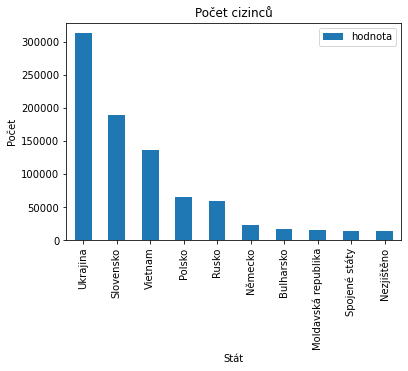

In [12]:
statistika.head(10).plot(kind="bar", xlabel="Stát", ylabel="Počet",
                         title="Počet cizinců")

Nyní si zopakujme, jak se definují v jazyku Python funkce. Naše funkce `vykresli_graf` bude mít jeden povinný argument `rok` a jeden nepovinný argument `uzemi`.

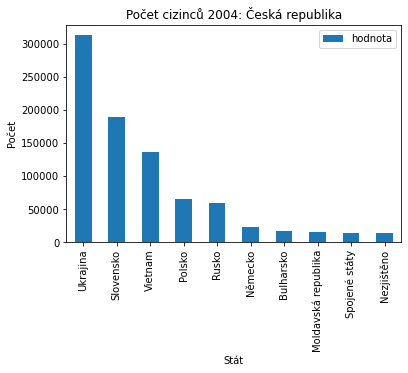

In [24]:
def vykresli_graf(rok, uzemi="Česká republika"):
    soubor = f"CIZ01_{rok}.csv"
    data = pd.read_csv(soubor)
    data_vyber = data[data["vuzemi_txt"] == uzemi]
    statistika = data_vyber.groupby("stobcan_txt")[["hodnota"]].sum().sort_values("hodnota", ascending=False)
    statistika.head(10).plot(kind="bar", xlabel="Stát", ylabel="Počet",
                            title=f"Počet cizinců {rok}: {uzemi}")
    
vykresli_graf(2004)

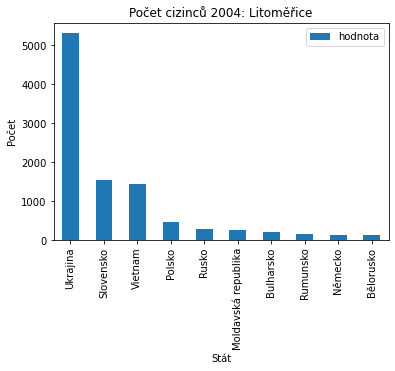

In [25]:
vykresli_graf(2004, "Litoměřice")

Odkazy na soubory jsou predikovatelné, mění se v nich pouze rok. Toho využijeme a definujeme novou funkce `stahni_soubor`.

In [26]:
from urllib import request

def stahni_soubor(rok):
    url = f"https://www.czso.cz/documents/62353418/93789313/290038-18data{rok}.zip"
    soubor = f"CIZ01_{rok}.zip"
    request.urlretrieve(url, soubor)
    print(f"Soubor {soubor} stažen")
    
stahni_soubor(2005)

Soubor CIZ01_2005.zip stažen


Nyní přidáme funkci pro rozbalení ZIP souboru do adresáře `data`.

In [30]:
from zipfile import ZipFile

def rozbal_soubor(rok):
    with ZipFile(f"CIZ01_{rok}.zip") as fd:
        fd.extractall("./")
        
rozbal_soubor(2005)

Definujeme novou funkci `vykresli_graf_ng`, která před vykreslením grafu daný soubor stáhne a rozbalí.

Soubor CIZ01_2006.zip stažen


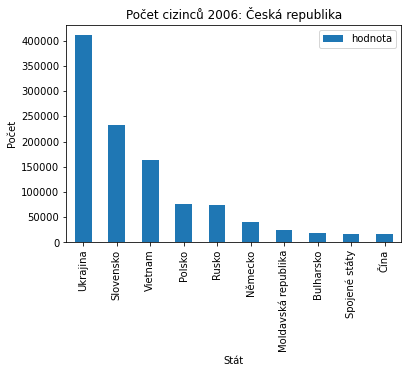

In [31]:
def vykresli_graf_ng(rok, uzemi="Česká republika"):
    stahni_soubor(rok)
    rozbal_soubor(rok)
    vykresli_graf(rok, uzemi)
    
vykresli_graf_ng(2006)

Soubor CIZ01_2007.zip stažen


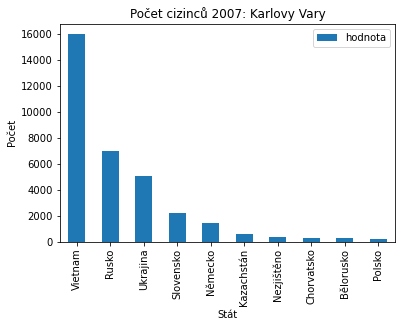

In [32]:
vykresli_graf_ng(2007, "Karlovy Vary")

Takto můžeme ve zpracování dat pokračovat. Knihovna [Pandas](https://pandas.pydata.org/) je velmi silný nástroj. Můžeme začít studiem [tutoriálu](https://pandas.pydata.org/docs/getting_started/intro_tutorials/) knihovny.

## Import dat do databáze SQLite

Opustíme knihovnu Pandas a ukážeme si zpracovaní dat pomocí tradiční souborové databáze SQLite. Nejrpve zkusíme vytvořit cvičnou databázi a pomocí jazyka SQL vytvořit tabulku.

In [33]:
import sqlite3

soubor_db = f"test.db"
con = sqlite3.connect(soubor_db)
cur = con.cursor()
cur.execute("CREATE TABLE test1 (sl1 int, sl2 text);")
cur.execute("INSERT INTO test1 VALUES(1, 'abc');")
con.commit()
con.close()

Pro vytvoření reálné tabulky budeme potřebovat seznam sloupců ze souboru CSV.

In [34]:
fd = open(soubor, encoding='utf-8-sig')
data = DictReader(fd)
print(data.fieldnames)
fd.close()

['idhod', 'hodnota', 'stapro_kod', 'pohlavi_cis', 'pohlavi_kod', 'stobcan_cis', 'stobcan_kod', 'vek_cis', 'vek_kod', 'rok', 'vuzemi_cis', 'vuzemi_kod', 'kraj_cis', 'kraj_kod', 'vuzemi_txt', 'kraj_txt', 'pohlavi_txt', 'stobcan_txt', 'vek_txt']


V dalším kroku definujeme dvě funkce. První z nich - `vytvor_tabulku()` má za ukol na základě sloupečků z CSV souboru vytvořit v databázi prázdnou tabulku. Druhá fuknce - `importuj_soubor()` naimportuje obsah CSV souboru do vytvořené tabulky.

In [36]:
def vytvor_tabulku(rok, soubor_db="CIZ01.db", tabulka=None):
    fd = open(f"CIZ01_{rok}.csv", encoding='utf-8-sig') 
    data = DictReader(fd)
    if tabulka is None:
        tabulka = f"CIZ01_{rok}"
    sql = f"CREATE TABLE {tabulka} ("
    polozky = []
    for polozka in data.fieldnames:
        if polozka.endswith("_txt"):
            polozky.append(f"{polozka} text")
        else:
            polozky.append(f"{polozka} int")
    sql += ",".join(polozky)
    sql += ");"
    
    fd.close()
    
    con = sqlite3.connect(soubor_db)
    cur = con.cursor()
    cur.execute(f"DROP TABLE IF EXISTS {tabulka};")
    cur.execute(sql)
    con.commit()
    con.close()   
    
def importuj_soubor(rok, soubor_db="CIZ01.db"):
    vytvor_tabulku(rok, soubor_db)
    fd = open(f"CIZ01_{rok}.csv", encoding='utf-8-sig') # problem s idhod
    data = DictReader(fd)
    
    hodnoty = []
    for radek in data:
        polozky = []
        for polozka in data.fieldnames:
            polozky.append(radek[polozka])
        hodnoty.append(polozky)
    
    seznam_sloupcu = ",".join(data.fieldnames)
    fd.close()
    
    con = sqlite3.connect(soubor_db)
    cur = con.cursor()
    pocet_hodnot = ",".join(['?'] * len(data.fieldnames))
    cur.executemany(f"INSERT INTO CIZ01_{rok} ({seznam_sloupcu}) VALUES ({pocet_hodnot});", hodnoty)
    con.commit()
    con.close() 
    
    
importuj_soubor(2004)

Výsledek můžeme zkontrolovat např. pomocí grafické aplikace [DB Browser for SQLite](https://sqlitebrowser.org/) nebo pomocí Python kódu níže.

In [37]:
con = sqlite3.connect("CIZ01.db")
cur = con.cursor()
cur.execute("SELECT * FROM CIZ01_2004")
odpoved = cur.fetchone()
print(odpoved)
con.close()

(783267904, 78263, 6121, '', '', 3228, 804, '', '', 2004, 97, 19, '', '', 'Česká republika', '', '', 'Ukrajina', '')


Dále vytvoříme funkci, která zpracuje všechna data od roku `rok_od` do `rok_do` a přidá do databáze dvě nové tabulky se statistikami pouze za ČR a poté za okresy.

In [38]:
def zpracuj_soubory(rok_od, rok_do, soubor_db="data/CIZ01.db"):
    vytvor_tabulku(rok_od, soubor_db, "CIZ01")
    vytvor_tabulku(rok_od, soubor_db, "CIZ01_okresy")
    
    for rok in range(rok_od, rok_do+1):
        stahni_soubor(rok)
        rozbal_soubor(rok)
        importuj_soubor(rok, soubor_db)
    
        con = sqlite3.connect(soubor_db)
        cur = con.cursor()
        cur.execute(f"INSERT INTO CIZ01 SELECT * FROM CIZ01_{rok} WHERE vuzemi_txt = 'Česká republika'")
        cur.execute(f"INSERT INTO CIZ01_okresy SELECT * FROM CIZ01_{rok} WHERE vuzemi_txt != 'Česká republika'")
        con.commit()       
        con.close() 
    
zpracuj_soubory(2004, 2017, "CIZ01_2004_2017.db")

Soubor CIZ01_2004.zip stažen
Soubor CIZ01_2005.zip stažen
Soubor CIZ01_2006.zip stažen
Soubor CIZ01_2007.zip stažen
Soubor CIZ01_2008.zip stažen
Soubor CIZ01_2009.zip stažen
Soubor CIZ01_2010.zip stažen
Soubor CIZ01_2011.zip stažen
Soubor CIZ01_2012.zip stažen
Soubor CIZ01_2013.zip stažen
Soubor CIZ01_2014.zip stažen
Soubor CIZ01_2015.zip stažen
Soubor CIZ01_2016.zip stažen
Soubor CIZ01_2017.zip stažen


Výsledek zkontrolujeme pomocí jednoduchého SQL příkazu.

In [39]:
con = sqlite3.connect("CIZ01_2004_2017.db")
cur = con.cursor()
cur.execute("SELECT stobcan_txt, hodnota, rok FROM CIZ01 GROUP BY stobcan_txt, rok HAVING stobcan_txt = 'Ukrajina' ORDER BY rok")
odpoved = cur.fetchall()
for radek in odpoved:
    print(radek)
con.close()

('Ukrajina', 78263, 2004)
('Ukrajina', 87789, 2005)
('Ukrajina', 102594, 2006)
('Ukrajina', 126721, 2007)
('Ukrajina', 131921, 2008)
('Ukrajina', 131932, 2009)
('Ukrajina', 124281, 2010)
('Ukrajina', 118932, 2011)
('Ukrajina', 112549, 2012)
('Ukrajina', 105138, 2013)
('Ukrajina', 104156, 2014)
('Ukrajina', 105614, 2015)
('Ukrajina', 109850, 2016)
('Ukrajina', 117061, 2017)


Na závěr vykreslíme graf pomocí knihovny [Matplotlib](https://matplotlib.org/).

<BarContainer object of 14 artists>

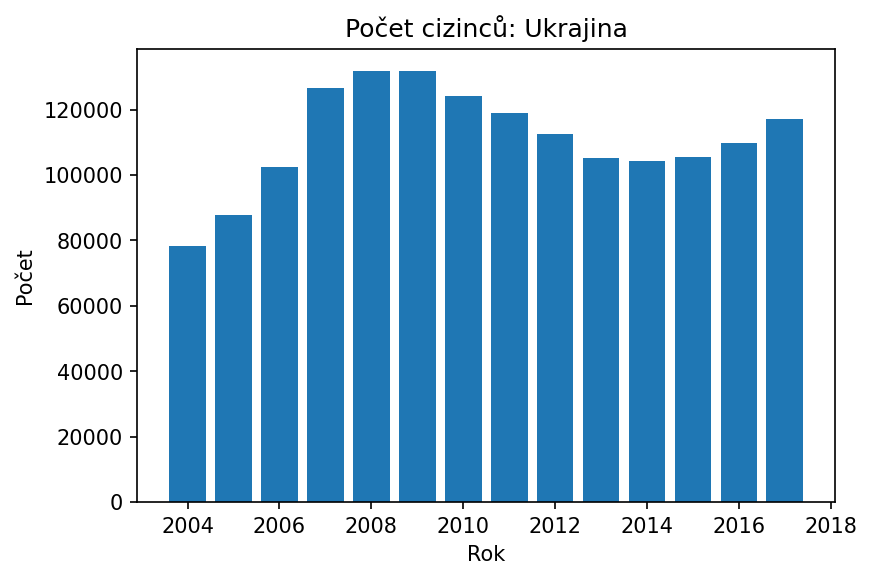

In [40]:
import matplotlib.pyplot as plt

pocet_cizincu = []
rok = []
for radek in odpoved:
    stat = radek[0]
    pocet_cizincu.append(radek [1])
    rok.append(radek[2])

fig, ax = plt.subplots(dpi=150)
ax.set_title(f"Počet cizinců: {stat}")
ax.set_xlabel("Rok")
ax.set_ylabel("Počet")
ax.bar(rok, pocet_cizincu)

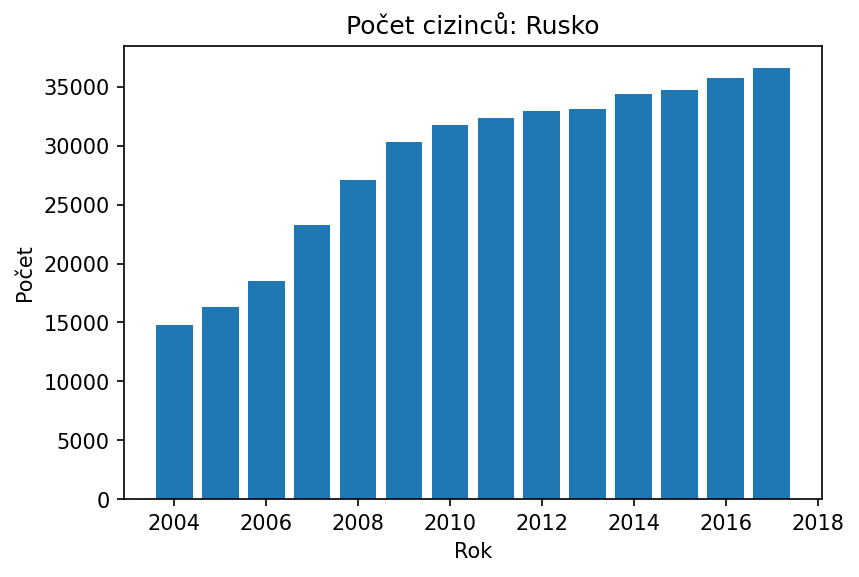

In [42]:
def vykresli_graf_db(soubor_db, stat):
    con = sqlite3.connect(soubor_db)
    cur = con.cursor()
    cur.execute(f"SELECT stobcan_txt, hodnota, rok FROM CIZ01 GROUP BY stobcan_txt, rok HAVING stobcan_txt = '{stat}' ORDER BY rok")
    odpoved = cur.fetchall()
    con.close()
    
    pocet_cizincu = []
    rok = []
    for radek in odpoved:
        pocet_cizincu.append(radek [1])
        rok.append(radek[2])

    fig, ax = plt.subplots(dpi=150)
    ax.set_title(f"Počet cizinců: {stat}")
    ax.set_xlabel("Rok")
    ax.set_ylabel("Počet")
    ax.bar(rok, pocet_cizincu)
    
vykresli_graf_db("CIZ01_2004_2017.db", "Rusko")